#Today's problem involves analyzing car data. This dataset comprises 1728 rows and 6 different attributes: buying price, price of maintenance, number of doors, capacity in terms of persons to carry, the relative size of the luggage boot, and the estimated safety value of each car.
#The Problem: You are tasked with constructing and evaluating a decision tree classifier on this dataset. Utilize and compare different types of split criteria (entropy, Gini index, loss). The decision tree will classify the type of car into one of the following categories: 1) unacceptable, 2) acceptable, 3) good, or 4) very good.

#In addition to developing an ML model, you also need to visualize a trees based on your developed models. The tree can be visualized using graphviz library.

#Note - This time, the data is split into several CSV files and stored in a zipped folder. You need to merge or concatenate the data after reading from multiple files.
#Resource for combining dataframes:
https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html

#Resources for drawing a tree using Graphviz:

https://scikit-learn.org/stable/modules/generated/sklearn.tree.export_graphviz.html

https://canvas.anglia.ac.uk/files/4155049/download?download_frd=1



In [1]:
################################################################################
#
#
# Your code to develop a decision tree classifier.
# Check the accuracy, performance metrices, and confusion metrics.
# Draw the decision tree using Graphviz.
# You can split your code into different cells according to your own choice
#
#
################################################################################
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.tree import export_graphviz
import graphviz


In [2]:
# Load the datasets
df0 = pd.read_csv('car_evaluation_0.csv')
df1 = pd.read_csv('car_evaluation_1.csv')
df2 = pd.read_csv('car_evaluation_2.csv')
df3 = pd.read_csv('car_evaluation_3.csv')

# Combine the datasets into a single DataFrame
df = pd.concat([df0, df1, df2, df3], ignore_index=True)
df.head()

,buyPrice,maintCost,noDoors,noPersons,bootLuggage,safety,decision
0,vhigh,vhigh,2,2,small,med,unacc
1,vhigh,vhigh,2,2,small,high,unacc
2,vhigh,vhigh,2,2,med,low,unacc
3,vhigh,vhigh,2,2,med,med,unacc
4,vhigh,vhigh,2,2,med,high,unacc


In [3]:
# Prepare the feature matrix (X) and target vector (y)
X = df.drop('decision', axis=1)
y = df['decision']

In [4]:
# Encode categorical variables
X = pd.get_dummies(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [5]:
# Initialize the decision tree classifiers
dt_entropy = DecisionTreeClassifier(criterion='entropy', random_state=42)
dt_gini = DecisionTreeClassifier(criterion='gini', random_state=42)

# Fit the classifiers
dt_entropy.fit(X_train, y_train)
dt_gini.fit(X_train, y_train)

# Predictions
y_pred_entropy = dt_entropy.predict(X_test)
y_pred_gini = dt_gini.predict(X_test)

In [6]:
# Accuracy and performance metrics
accuracy_entropy = accuracy_score(y_test, y_pred_entropy)
accuracy_gini = accuracy_score(y_test, y_pred_gini)

print(f"Accuracy with Entropy: {accuracy_entropy:.2f}")
print(f"Accuracy with Gini Index: {accuracy_gini:.2f}")

print("\nClassification Report with Entropy:")
print(classification_report(y_test, y_pred_entropy))

print("\nClassification Report with Gini Index:")
print(classification_report(y_test, y_pred_gini))

Accuracy with Entropy: 0.97
Accuracy with Gini Index: 0.95

Classification Report with Entropy:
              precision    recall  f1-score   support

         acc       0.97      0.95      0.96       118
        good       0.67      0.82      0.74        17
       unacc       0.99      1.00      0.99       361
       vgood       0.85      0.74      0.79        23

    accuracy                           0.97       519
   macro avg       0.87      0.88      0.87       519
weighted avg       0.97      0.97      0.97       519


Classification Report with Gini Index:
              precision    recall  f1-score   support

         acc       0.93      0.94      0.93       118
        good       0.73      0.65      0.69        17
       unacc       0.98      0.99      0.99       361
       vgood       0.76      0.70      0.73        23

    accuracy                           0.95       519
   macro avg       0.85      0.82      0.83       519
weighted avg       0.95      0.95      0.95      

In [7]:
def display_decision_tree(classifier, feature_names, class_names):
    dot_data = export_graphviz(
        classifier,
        out_file=None,
        feature_names=feature_names,
        class_names=class_names,
        filled=True,
        rounded=True,
        special_characters=True
    )
    return graphviz.Source(dot_data)

In [8]:
graph_entropy = display_decision_tree(dt_entropy, X_train.columns, dt_entropy.classes_)
graph_gini = display_decision_tree(dt_gini, X_train.columns, dt_gini.classes_)

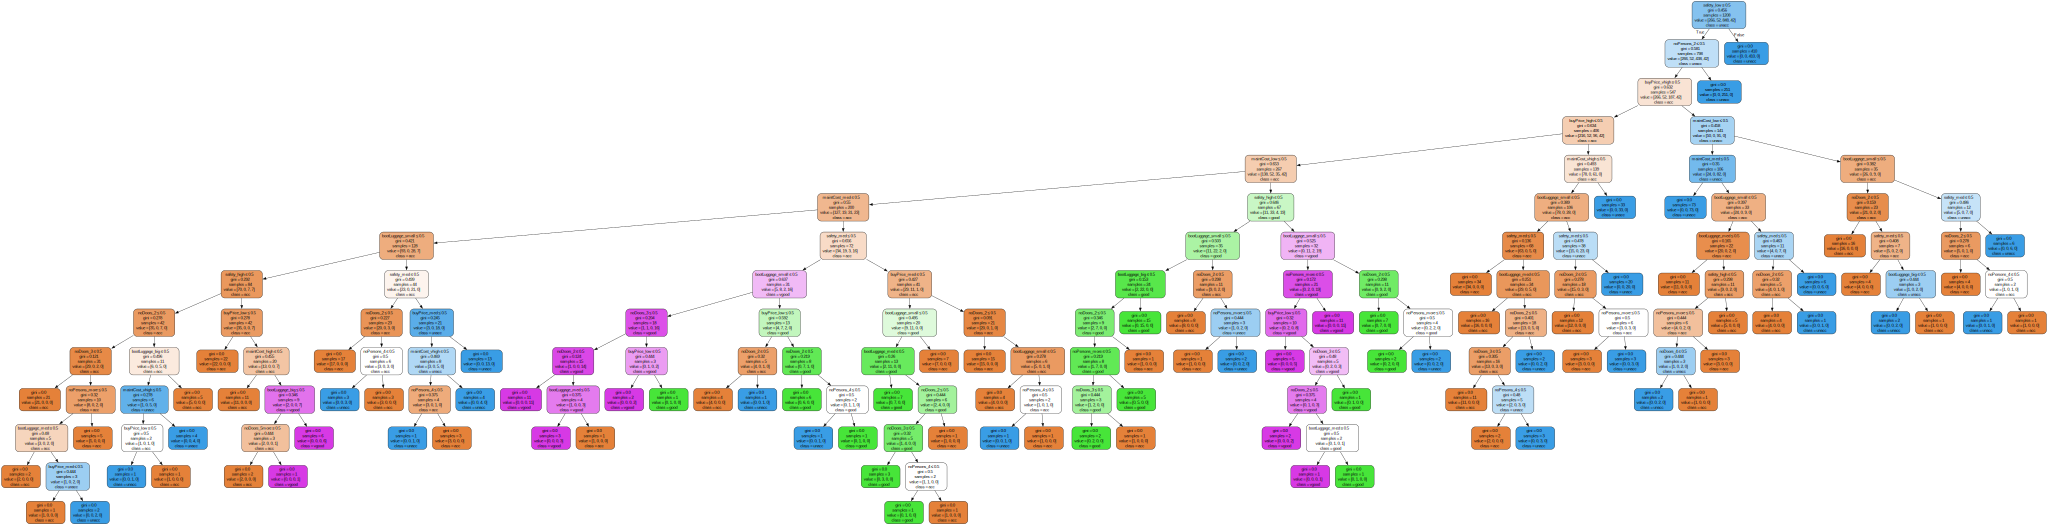

In [10]:
# Render and display the decision trees
# graph_entropy.render('decision_tree_entropy')
# graph_gini.render('decision_tree_gini')

graph_entropy
graph_gini

# Lab Logbook requirements. Answer the following questions and put in your lab logbook (Do not use more than 2 sentences for each question):


1.   What is the decision criterion at each node of the decision tree?
2.   How is entropy/gini index/loss change at each node?
3.   Is entropy decreasing or increasing in as we move down in tree?
4.   How many samples are left at each node? Can you see any pattern?
5.   What information is contained at leaf node?



In [ ]:
# Optional - The following is optional.

################################################################################
#
#
#Compare Decision tree performnce with SVM, KNN, and Logistic Regression.
# You can split your code into different cells according to your own choise
#
#
################################################################################